In [1406]:
# Importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm
%matplotlib inline
import math

In [1541]:
# Reading in data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [1542]:
# Viewing training data
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [1543]:
# Viewing test data
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [1544]:
# dropping ID column from both data sets
train_ID = train['Id']
test_ID = test['Id']

train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

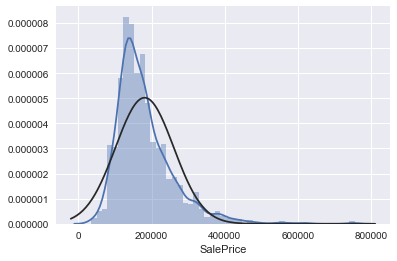

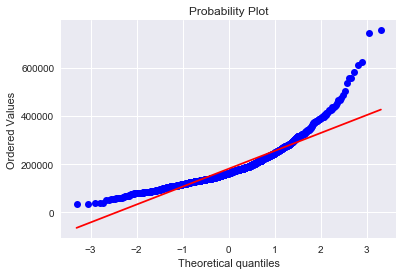

In [1545]:
# Viewing dependent variable
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

In [1546]:
# It's not normal, so we log + 1 transform
train["SalePrice"] = np.log1p(train["SalePrice"])

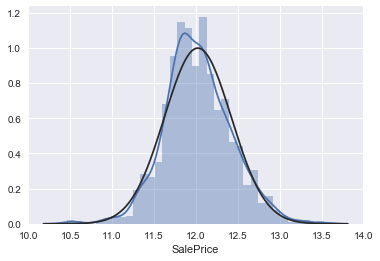

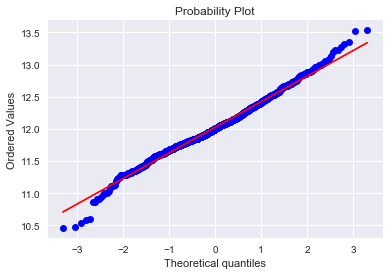

In [1547]:
# Looks much better
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

From the descriptive thing:
    "There are 5 observations that an instructor may wish to remove from the data set before giving it to students (a plot of SALE PRICE versus GR LIV AREA will indicate them quickly). Three of them are true outliers (Partial Sales that likely don’t represent actual market values) and two of them are simply unusual sales (very large houses priced relatively appropriately)."

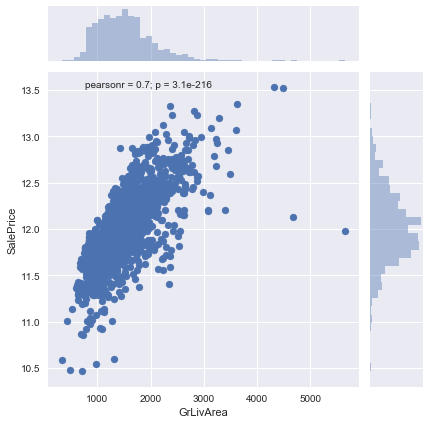

In [1548]:
# Viewing SalePrice vs. GrLivArea
sns.jointplot(x="GrLivArea", y="SalePrice", data=train)

In [1549]:
# Removing Outiers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

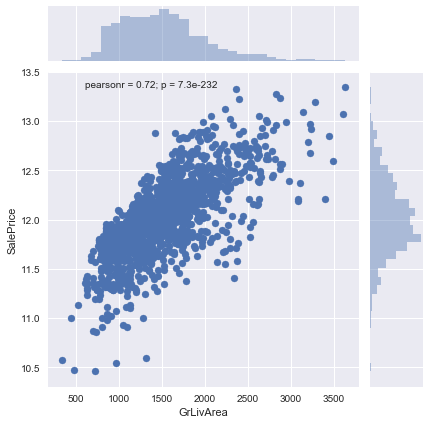

In [1550]:
# View again
sns.jointplot(x ="GrLivArea", y="SalePrice", data=train)

trying out log1p to see if i can undo it for the results 

In [1551]:
# concatenating training and testing sets to deal with missingness
data = pd.concat((train, test)).reset_index(drop=True)
data.drop(['SalePrice'], axis=1, inplace=True)
print("data size is : {}".format(data.shape))

data size is : (2915, 79)


# Handling Missingness

In [1552]:
# visualizing the missing variables
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# missing.head(20)

Missing Features:
    Alley: data desc says na means "no alley access"
    BsmtQual, BsmtCond, BsmntExposure, BsmtFinType1, BsmtFinType2: data desc says NA means "no basement"
    FireplaceQU: desc says NA means "No Fireplace"
    GarageType, GarageFinish,GaraGarageQual, GarageCond: desc says NA means "No Garage"
    PoolQC: desc says NA means "No Pool"
    Fence: desc says NA means "No Fence"
    MiscFeature: desc says NA means "None"

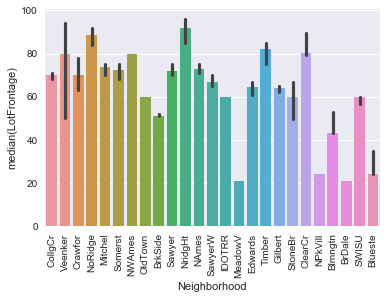

In [1553]:
sns.barplot(data=data,x='Neighborhood',y='LotFrontage', estimator=np.median)
plt.xticks(rotation=90)
plt.show()
plt.gcf().clear()

In [1554]:
data["LotFrontage"] = data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [1555]:
# imputing missing categorical features to "None"
data["Alley"] = data["Alley"].fillna("None")
data["BsmtQual"] = data["BsmtQual"].fillna("None")
data["BsmtCond"] = data["BsmtCond"].fillna("None")
data["BsmtExposure"] = data["BsmtExposure"].fillna("None")
data["BsmtFinType1"] = data["BsmtFinType1"].fillna("None")
data["BsmtFinType2"] = data["BsmtFinType2"].fillna("None")
data["FireplaceQu"] = data["FireplaceQu"].fillna("None")
data["GarageType"] = data["GarageType"].fillna("None")
data["GarageFinish"] = data["GarageFinish"].fillna("None")
data["GarageQual"] = data["GarageQual"].fillna("None")
data["GarageCond"] = data["GarageCond"].fillna("None")
data["PoolQC"] = data["PoolQC"].fillna("None")
data["Fence"] = data["Fence"].fillna("None")
data["MiscFeature"] = data["MiscFeature"].fillna("None")

In [1556]:
# Changing missing garage years go to zero
data["GarageYrBlt"] = data["GarageYrBlt"].fillna(0)

# this did nothing
# # then changing this to binary
# data["GarageYrBlt"] = data["GarageYrBlt"].apply(lambda x: "Yes" if x > 0 else "No")

most likely no basement so setting these basement measurements to zero

In [1557]:
# missing SF variables likely mean that feature is absent
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    data[col] = data[col].fillna(0)

Probably no masonry veneer for these houses so setting to 0 or none

In [1558]:
data["MasVnrType"] = data["MasVnrType"].fillna("None")
data["MasVnrArea"] = data["MasVnrArea"].fillna(0)

filling the 4 missing zoning's with residential- the most common seen zoning type

In [1559]:
data['MSZoning'] = data['MSZoning'].fillna(data['MSZoning'].mode()[0])

trying dropping utilities to see if this improves accuracy

In [1560]:
data = data.drop(['Utilities'], axis=1)

filling missing functional with most common type (typ)

In [1561]:
data['Functional'] = data['Functional'].fillna("Typ")

removing missing garage cars and area

In [1562]:
data['GarageCars'] = data['GarageCars'].fillna(0)
data['GarageArea'] = data['GarageArea'].fillna(0)

filling the remaining missing values by the most commonly seen value

In [1563]:
data['Exterior1st'] = data['Exterior1st'].fillna(data['Exterior1st'].mode()[0])
data['Exterior2nd'] = data['Exterior2nd'].fillna(data['Exterior2nd'].mode()[0])
data['KitchenQual'] = data['KitchenQual'].fillna(data['KitchenQual'].mode()[0])
data['SaleType'] = data['SaleType'].fillna(data['SaleType'].mode()[0])
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])

In [1564]:
data['Functional'] = data['Functional'].fillna(data['Functional'].mode()[0])

In [1565]:
# viewing correlations with variables
# data.corr()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
1stFlrSF,1.000000,-0.275428,0.045826,0.106957,0.431150,0.088410,0.252646,0.007834,0.302535,-0.064701,...,-0.158382,0.472516,0.070446,0.102667,0.381251,0.791730,0.224860,0.310370,0.241032,-0.011810
2ndFlrSF,-0.275428,1.000000,-0.032255,0.503353,-0.185738,-0.097120,-0.165420,-0.064719,-0.001006,0.056491,...,0.006496,0.237158,0.018080,0.012316,0.581145,-0.231577,0.085622,0.013914,0.157064,-0.017271
3SsnPorch,0.045826,-0.032255,1.000000,-0.048201,0.053212,-0.023311,0.027641,0.027056,-0.005734,-0.032876,...,0.043706,0.019210,-0.005950,-0.029588,-0.025512,0.039938,-0.003772,0.016109,0.037572,0.022506
BedroomAbvGr,0.106957,0.503353,-0.048201,1.000000,-0.120370,-0.030821,-0.156184,0.017076,0.183601,0.050362,...,-0.008369,0.070535,0.030746,0.007565,0.671252,0.051886,0.030220,-0.054058,-0.022584,-0.019871
BsmtFinSF1,0.431150,-0.185738,0.053212,-0.120370,1.000000,-0.054359,0.644843,0.079685,-0.491133,-0.099816,...,-0.049225,0.271057,0.014262,0.101910,0.031322,0.508490,0.222864,0.280038,0.149845,0.024631
BsmtFinSF2,0.088410,-0.097120,-0.023311,-0.030821,-0.054359,1.000000,0.163741,0.100099,-0.238044,0.032635,...,0.041255,-0.041713,0.051257,0.063221,-0.047401,0.094673,0.099069,-0.027130,-0.061659,0.008703
BsmtFullBath,0.252646,-0.165420,0.027641,-0.156184,0.644843,0.163741,1.000000,-0.147821,-0.398149,-0.067781,...,-0.041907,0.162111,0.026504,0.053806,-0.044459,0.322844,0.186158,0.210653,0.133842,0.045377
BsmtHalfBath,0.007834,-0.064719,0.027056,0.017076,0.079685,0.100099,-0.147821,1.000000,-0.108434,-0.009258,...,0.083494,-0.043786,0.075197,0.042527,-0.052265,0.010631,0.049075,-0.030979,-0.046743,-0.019407
BsmtUnfSF,0.302535,-0.001006,-0.005734,0.183601,-0.491133,-0.238044,-0.398149,-0.108434,1.000000,0.005273,...,-0.138899,0.276348,-0.030344,-0.048950,0.248673,0.424994,-0.039817,0.130632,0.165657,-0.037852
EnclosedPorch,-0.064701,0.056491,-0.032876,0.050362,-0.099816,0.032635,-0.067781,-0.009258,0.005273,1.000000,...,0.070922,-0.138634,0.103856,-0.064527,0.016788,-0.084935,-0.118688,-0.373880,-0.220182,-0.001338


# Feature Engineering

transforming year and month into categorical features

In [1566]:
data['YrSold'] = data['YrSold'].astype(str)
data['MoSold'] = data['MoSold'].astype(str)

gonna try putting overall condition as categorical

In [1567]:
data['OverallCond'] = data['OverallCond'].astype(str)
data['OverallQual'] = data['OverallQual'].astype(str)
# data['KitchenAbvGr'] = data['KitchenAbvGr'].astype(str) # added here

MSSubClass should be categorical as well

In [1568]:
data['MSSubClass'] = data['MSSubClass'].astype(str)

overall SF? we have TotalBsmtSF, 1stFlrSF and 2ndFlrSF
might be worth putting them together into a "overall SF"category?

In [1569]:
data['OverallSF'] = data['1stFlrSF'] + data['2ndFlrSF'] + data['TotalBsmtSF']

going to try combining categorical data with it's quality:
BsmtQual * BsmtCond
OverallQual * Neighborhood
Condition1 * Condition2
BldgType * OverallQual
ExterQual * ExterCond
KitchenQual * OverallQual
GarageType * GarageQual
GarageType * GarageCond
MoSold * YrSold
SaleType * SaleCondition
SaleType * OverallCond

Lasso score: 0.1122 (0.0134)
ElasticNet score: 0.1098 (0.0145)

In [1570]:
data['BsmnQual_BsmtCond'] = data['BsmtQual'] + data['BsmtCond']
# data['OverallQual_Neighborhood'] = data['OverallQual'] + data['Neighborhood'] # another
data['Condition1_Condition2'] = data['Condition1'] + data['Condition2']
# data['BldgType_OverallQual'] = data['BldgType'] + data['OverallQual'] # another
data['ExterQual_ExterCond'] = data['ExterQual'] + data['ExterCond']
# data['KitchenQual_OverallQual'] = data['KitchenQual'] + data['OverallQual'] # another
data['GarageType_GarageQual'] = data['GarageType'] + data['GarageQual']
data['GarageType_GarageCond'] = data['GarageType'] + data['GarageCond'] #--> ben used this (probably)
data['MoSold_YrSold'] = data['MoSold'] + data['YrSold']
data['SaleType_SaleCondition'] = data['SaleType'] + data['SaleCondition']
data['SaleType_OverallCond'] = data['SaleType'] + data['OverallCond']

# Handling nominal & ordinal categories

Nomial categories

"MSSubClass", MSZoning, "Street", "Alley", LandContour, LotConfig, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1, Exterior2, MasVnrType, MasVnrArea, Foundation, Heating, "CentralAir", GarageType, MiscFeature, SaleType, SaleCondition

Ordinal Categories

LotShape, Utilities, LandSlope, OverallQual, OverallCond, ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, HeatingQC, Electrical, KitchenQual, Functional, FireplaceQu, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC, Fence

In [1571]:
from sklearn.preprocessing import LabelEncoder
category = ('LotShape', 'LandSlope', 'OverallCond', 'ExterQual', 'ExterCond', 
            'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
            'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish',
            'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'OverallCond', 
            'YrSold', 'MoSold', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'GarageYrBlt')

for c in category:
    lbl = LabelEncoder()
    lbl.fit(list(data[c].values))
    data[c] = lbl.transform(list(data[c].values))

# Handling skewness

In [1572]:
# numerical = data.dtypes[data.dtypes != "object"].index

In [1573]:
# skewed = data[numerical].apply(lambda x: x.skew()).sort_values()
# skewed

In [1574]:
# skewdf = pd.DataFrame({'Skew': skewed})
# skewdf.head(3)

In [1575]:
# transform by boxcox
# skewdf = skewdf[abs(skewdf)>0.75]
# from scipy.special import boxcox1p, inv_boxcox1p
# skewed = skewdf.index
# lam = 0.15
# for feat in skewed:
#     data[feat] = boxcox1p(data[feat], lam)

# transform by log + 1
# # numerical = data.dtypes[data.dtypes != "object"].index
# for feat in numerical:
#     data[feat] = np.log1p(data[feat])

In [1576]:
# newskewed = data[numerical].apply(lambda x: x.skew()).sort_values()
# newskewed

In [1577]:
data2 = data.copy()
data = pd.get_dummies(data)

In [1578]:
print(data2.shape)
print(data.shape)

(2915, 87)
(2915, 447)


In [1579]:
# separating out the response variable
y_train = train.SalePrice.values 

Re-separating the data into test and train

In [1580]:
ntrain = train.shape[0] # number of rows in training set (1456)
ntest = test.shape[0] # number of rows in test set (1459)
train = data[:ntrain]
test = data[ntrain:]

# Running the Models

In [995]:
# Load libraries
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor as rfr,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

In [996]:
from bayes_opt import BayesianOptimization

In [997]:
def LinRegCV(alpha, l1_ratio):
    val = cross_val_score(make_pipeline(RobustScaler(), ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=1)),
                          train, y_train, scoring = 'neg_mean_squared_error', cv = 10, n_jobs = 3
                         ).mean()
    return val
LinRegBaye = BayesianOptimization(LinRegCV, {
    "alpha": (0,1),
    "l1_ratio": (0,1)
})

In [1235]:
LinRegBaye.maximize(n_iter = 30)

In [1237]:
# print("Final Results")
# print('Linear Regression: ', (-1* LinRegBaye.res['max']['max_val'])**0.5)
# print('Linear Regression: ', LinRegBaye.res['max']['max_params'])

In [ ]:
# creating function that calculates RMSE for each model
n_folds = 10
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=1).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [ ]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.00099, random_state=1))

In [ ]:
lasso

In [ ]:
score = rmsle_cv(lasso)
print("Lasso score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

switched away from boxcox to log1p and instantly improved by over 10%

In [ ]:
# ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=1))

In [ ]:
# score = rmsle_cv(ENet)
# print("ElasticNet score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

In [1581]:
# l_ratio = np.arange(0, 1, 0.1)
l_ratio = np.arange(0.75, 0.95, 0.01)
# alpha = np.arange(0, 0.001, 0.00005)
alpha = np.arange(0.0004, 0.0005, 0.00001)

In [1582]:
results = pd.DataFrame({"Alpha":[], "L1":[], "Score":[]})
for i in l_ratio:
    for j in alpha:
        ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=j, l1_ratio=i, random_state=1))
        score = rmsle_cv(ENet).mean()
        results = results.append({"Alpha": j, "L1": i, "Score":score}, ignore_index=True)
#         print("ElasticNet score: {:.4f} ({:.4f})".format(score.mean(), score.std()))
#         print(i, j)
#         print("-" * 60)

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

In [185]:
# alpha = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009]
# ben's base data
# boxcox
results.loc[results.Score == min(results.Score),:]

,Alpha,L1,Score
75,0.0004,0.9,0.110001


In [190]:
# alpha = np.arange(0, .6, .01))
results.loc[results.Score == min(results.Score),:]

,Alpha,L1,Score
1,0.01,0.0,0.11179


In [201]:
# alpha = np.arange(0, 0.001, 0.000025)
results.loc[results.Score == min(results.Score),:]

,Alpha,L1,Score
376,0.0004,0.9,0.110001


In [253]:
# alpha = np.arange(0, 0.001, 0.00005)
# ben's base data
# nplog1
results.loc[results.Score == min(results.Score),:]

,Alpha,L1,Score
188,0.0004,0.9,0.111354


In [390]:
# ben's base data including garage grouping
# boxcox
results.loc[results.Score == min(results.Score),:]

,Alpha,L1,Score
189,0.00045,0.9,0.109809


In [459]:
# alpha = np.arange(0.0004, 0.0005, 0.00001)
# ben's base data including garage grouping
results.loc[results.Score == min(results.Score),:]

,Alpha,L1,Score
93,0.00043,0.9,0.109806


In [590]:
# alpha = np.arange(0.0004, 0.0005, 0.00001)
# ben's base data EXCLUDING all groupings (except totalsf)
results.loc[results.Score == min(results.Score),:]

,Alpha,L1,Score
96,0.00046,0.9,0.109684


In [658]:
# l_ratio = np.arange(0.75, 0.95, 0.01)
# alpha = np.arange(0.0004, 0.0005, 0.00001)
results.loc[results.Score == min(results.Score),:]

,Alpha,L1,Score
194,0.00044,0.94,0.109678


In [771]:
# l_ratio = np.arange(0, 1, 0.1)
# alpha = np.arange(0, 0.001, 0.00005)
# turned overallqual to string
# ALL Ben's columns
results.loc[results.Score == min(results.Score),:]

,Alpha,L1,Score
188,0.0004,0.9,0.10953


In [1001]:
# l_ratio = np.arange(0.75, 0.95, 0.01)
# alpha = np.arange(0.0004, 0.0005, 0.00001)
# turned overallqual to string
# ALL Ben's columns
results.loc[results.Score == min(results.Score),:]

,Alpha,L1,Score
140,0.0004,0.89,0.109528


In [1196]:
# l_ratio = np.arange(0.75, 0.95, 0.01)
# alpha = np.arange(0.0004, 0.0005, 0.00001)
# turned overallqual to string
# ALL Ben's columns + KitchenAbvGr as category
results.loc[results.Score == min(results.Score),:]

,Alpha,L1,Score
140,0.0004,0.89,0.109483


In [1315]:
# l_ratio = np.arange(0.75, 0.95, 0.01)
# alpha = np.arange(0.0004, 0.0005, 0.00001)
# turned overallqual to string
# ALL Ben's columns + KitchenAbvGr as category
results.loc[results.Score == min(results.Score),:]

,Alpha,L1,Score
130,0.0004,0.88,0.10916


In [1359]:
# l_ratio = np.arange(0.75, 0.95, 0.01)
# alpha = np.arange(0.0004, 0.0005, 0.00001)
# turned overallqual to string
# ALL Ben's columns + KitchenAbvGr as category
# no transforming predictors
results.loc[results.Score == min(results.Score),:]

,Alpha,L1,Score
195,0.00045,0.94,0.113776


In [1403]:
# l_ratio = np.arange(0.75, 0.95, 0.01)
# alpha = np.arange(0.0004, 0.0005, 0.00001)
# turned overallqual to string
# ALL Ben's columns + KitchenAbvGr as category
# no transforming predictors
results.loc[results.Score == min(results.Score),:]

,Alpha,L1,Score
80,0.0004,0.83,0.113461


In [1583]:
# l_ratio = np.arange(0.75, 0.95, 0.01)
# alpha = np.arange(0.0004, 0.0005, 0.00001)
# turned overallqual to string
# no transforming predictors
# garageyrbuilt as yes/no
results.loc[results.Score == min(results.Score),:]

,Alpha,L1,Score
70,0.0004,0.82,0.113462


In [1360]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.00045, l1_ratio=.94, random_state=1))

In [1361]:
ENet.fit(train.values, y_train)

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('elasticnet', ElasticNet(alpha=0.00045, copy_X=True, fit_intercept=True, l1_ratio=0.94,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=1, selection='cyclic', tol=0.0001, warm_start=False))])

In [1184]:
# ENet.named_steps['elasticnet']._coeff
ENet.steps[1][1].coef_

array([  0.00000000e+00,  -0.00000000e+00,   1.43813667e-03,
         6.86158519e-03,  -7.02487939e-03,   1.23703186e-02,
        -2.23018700e-03,   4.44043212e-02,  -2.34566529e-03,
        -2.74775239e-03,  -2.75463185e-03,   2.50887239e-02,
         5.52340171e-03,  -1.74078308e-02,  -1.29627372e-02,
         4.74984787e-02,   3.07569553e-03,   0.00000000e+00,
        -1.02841718e-02,   1.36366272e-04,   0.00000000e+00,
         2.63391035e-02,   1.96907028e-02,   6.28909020e-02,
         9.21191343e-03,   3.47531404e-02,   0.00000000e+00,
        -1.94312508e-03,  -0.00000000e+00,  -2.23794564e-04,
         6.58414151e-02,   1.67006942e-02,  -2.42598232e-02,
        -1.52138749e-02,  -0.00000000e+00,   3.35290911e-02,
         3.62239374e-03,   2.92807495e-03,   2.14888037e-03,
        -9.71037022e-04,   1.96223291e-04,  -2.04126546e-03,
         1.24112220e-03,   7.41172095e-03,   4.57386864e-02,
         4.68427110e-03,   1.02887875e-02,   0.00000000e+00,
         5.77718181e-03,

In [1120]:
train.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1',
       ...
       'SaleType_OverallCond_Oth6', 'SaleType_OverallCond_WD1',
       'SaleType_OverallCond_WD2', 'SaleType_OverallCond_WD3',
       'SaleType_OverallCond_WD4', 'SaleType_OverallCond_WD5',
       'SaleType_OverallCond_WD6', 'SaleType_OverallCond_WD7',
       'SaleType_OverallCond_WD8', 'SaleType_OverallCond_WD9'],
      dtype='object', length=636)

In [1218]:
# coefs = pd.DataFrame({"Var":[], "Coefficient":[]})
# for i, j in train.columns, ENet.steps[1][1].coef_:
#     zip(i, j)
#     coefs = coefs.append({"Alpha": i, "L1": j}, ignore_index=True)

# list(zip(train.columns, ENet.steps[1][1].coef_)).sort(key = lambda x: x[1])
x = list(zip(train.columns, ENet.steps[1][1].coef_))

In [1219]:
x.sort(key = lambda x: x[1])

In [1220]:
df = pd.DataFrame(x, columns=['Var', 'Coeff'])

In [1221]:
top_pos = df["Coeff"][-20:]
top_neg = df["Coeff"][:20]
top_pos_names = df["Var"][-20:]
top_neg_names = df["Var"][:20]

In [1222]:
top_coefs = np.hstack([top_neg, top_pos])
top_names = np.hstack([top_neg_names, top_pos_names])
len(top_coefs)

40

In [1234]:
# df.to_csv('top40_coeffs.csv', index = False)

# betas = top_neg.append(top_pos)
# col_names = top_neg_names.append(top_pos_names)

# col_names
top40_coeffs = pd.concat([col_names, betas], axis=1)
top40_coeffs.to_csv("top40_coeffs.csv", index = False)

([<matplotlib.axis.XTick at 0x1a37692588>,
 <a list of 40 Text xticklabel objects>)

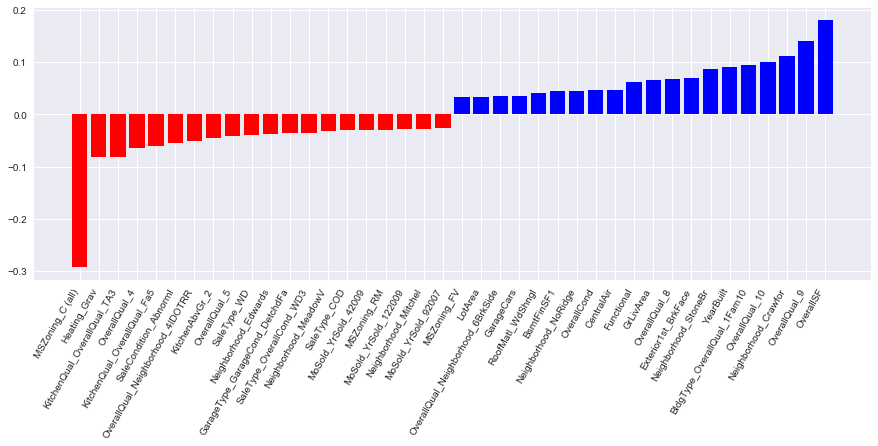

In [1224]:
plt.figure(figsize = (15, 5))
colors = ['red' if c < 0 else 'blue' for c in top_coefs]
plt.bar(np.arange(40), top_coefs, color = colors)
feature_names = np.array(train.columns)
plt.xticks(np.arange(40), top_names, rotation = 60, ha = 'right')

In [1055]:
top_coefs

array([-0.29288049, -0.09201805, -0.08530073, -0.07896887, -0.0608156 ,
       -0.05975   , -0.05415344, -0.04746817, -0.04062164, -0.03796728,
       -0.03627059, -0.03600811, -0.0343749 , -0.03301371, -0.03074115,
       -0.03056151, -0.02899637, -0.02818314, -0.02733769, -0.02672209,
        0.03259205,  0.03365194,  0.03543762,  0.03556644,  0.04185187,
        0.04394701,  0.0457289 ,  0.04596383,  0.04851037,  0.06335618,
        0.06926973,  0.06951905,  0.07050345,  0.08743881,  0.0911852 ,
        0.09565074,  0.10244329,  0.11103936,  0.1437736 ,  0.17582912])

In [1362]:
# prediction
pred = np.expm1(ENet.predict(test))

In [1363]:
pred

array([ 119668.21234145,  148156.06059053,  186356.43001657, ...,
        171477.1883007 ,  116292.42776599,  225436.46444306])

In [1364]:
pd.DataFrame(pred).to_csv('predictions4.csv', index = False)

ok so my scores are terrible, i'm probably going to need to go back and mess with the data classifications

In [163]:
def GBoostCV(n_estimators, max_depth, max_features):
    val = cross_val_score(GradientBoostingRegressor(n_estimators = int(n_estimators), learning_rate = 0.05,
                                   max_depth=int(max_depth), max_features = int(max_features),
                                   min_samples_leaf=10, 
                                   loss='huber', random_state =5),
                          train, y_train, scoring = 'neg_mean_squared_error', cv = 10, n_jobs = 3
                         ).mean()
    return val
GBoost_Bayes = BayesianOptimization(GBoostCV, {
    "n_estimators": (100,10000),
    "max_depth": (1,10),
    "max_features": (1, 421)
})

In [164]:
GBoost_Bayes.maximize(n_iter = 30)

Initialization
-----------------------------------------------------------------------------
 Step |   Time |      Value |   max_depth |   max_features |   n_estimators | 
    1 | 00m26s |   -0.01287 |      2.0840 |        22.1832 |      4831.5527 | 
    2 | 00m32s |   -0.01364 |      1.5813 |       266.0426 |      4389.7851 | 
    3 | 01m45s |   -0.01608 |      7.4660 |       370.4634 |      1149.9743 | 
    4 | 02m42s |   -0.01492 |      7.2838 |       153.4045 |      7277.2242 | 
    5 | 00m15s |   -0.01366 |      2.4553 |       244.4546 |      1062.9357 | 
Bayesian Optimization
-----------------------------------------------------------------------------
 Step |   Time |      Value |   max_depth |   max_features |   n_estimators | 
    6 | 01m53s |   -0.01346 |      1.7792 |       420.9064 |      9995.3519 | 
    7 | 00m04s |   -0.09094 |      1.1086 |         2.2153 |       109.4422 | 
    8 | 00m14s |   -0.01680 |      9.6253 |         1.4777 |      2708.1898 | 
    9 | 00m44s | 

/Applications/anaconda/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ -2.92817207e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 49, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)


   10 | 02m16s |   -0.01392 |      2.9191 |       420.5078 |      5974.4854 | 
   11 | 06m47s |   -0.01524 |      4.0508 |       419.7444 |      8784.5674 | 
   12 | 00m10s |   -0.01875 |      8.8171 |         1.2671 |      1625.8395 | 
   13 | 00m23s |   -0.01756 |      1.4554 |         1.3415 |      6347.6525 | 
   14 | 00m18s |   -0.01637 |      3.6564 |         1.6979 |      3790.1322 | 
   15 | 00m32s |   -0.01528 |      1.2652 |         2.3671 |      8395.8842 | 
   16 | 00m36s |   -0.01391 |      1.6075 |       417.8333 |      3129.6801 | 


/Applications/anaconda/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([  5.08415910e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 53, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)


   17 | 01m26s |   -0.01351 |      1.0924 |       419.0092 |      7905.7431 | 
   18 | 00m59s |   -0.01366 |      1.3959 |       419.5850 |      5190.1157 | 


/Applications/anaconda/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ -1.18935659e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 52, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)


   19 | 00m38s |   -0.01627 |      1.3768 |         1.0946 |      9398.2973 | 


/Applications/anaconda/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ -1.02181508e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 52, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ -4.50983155e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 52, 'nit': 6, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ -6.93357972e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 48, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)


   20 | 01m18s |   -0.01355 |      1.1368 |       418.7524 |      6865.5688 | 
   21 | 00m32s |   -0.01333 |      1.0200 |        41.3579 |      5503.9388 | 
   22 | 00m34s |   -0.01406 |      1.0024 |       407.3077 |      2459.8296 | 
   23 | 00m14s |   -0.02020 |      1.0881 |         3.3096 |      1159.0684 | 
   24 | 00m23s |   -0.01411 |      1.0152 |       223.7635 |      1975.5020 | 
   25 | 04m59s |   -0.01682 |      9.9382 |       416.0872 |      9541.4470 | 
   26 | 00m31s |   -0.01391 |      1.1624 |       233.3340 |      2846.8390 | 
   27 | 01m35s |   -0.01365 |      2.1517 |       419.8020 |      3761.6939 | 
   28 | 00m18s |   -0.01523 |      1.1524 |       417.4254 |       808.2995 | 


/Applications/anaconda/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


   29 | 04m58s |   -0.01651 |      8.4568 |       419.2639 |      7399.4809 | 


/Applications/anaconda/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 0.00017233]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 54, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)


   30 | 00m35s |   -0.01538 |      1.2738 |         2.5416 |      7704.0585 | 
   31 | 00m21s |   -0.01382 |      1.0080 |        71.0732 |      2334.5919 | 


/Applications/anaconda/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00014188]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 59, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)


   32 | 03m38s |   -0.01588 |      9.9988 |       268.6578 |      8206.5893 | 


/Applications/anaconda/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00101841]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 48, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)


   33 | 00m43s |   -0.01353 |      1.0132 |       191.3315 |      5096.3297 | 


/Applications/anaconda/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


   34 | 00m35s |   -0.01356 |      1.0217 |         9.8326 |      7008.8678 | 
   35 | 01m14s |   -0.01332 |      1.0300 |       195.1673 |      9970.5569 | 


In [166]:
print("Final Results")
print('GBoost: ', (-1* GBoost_Bayes.res['max']['max_val'])**0.5)
print('GBoost: ', GBoost_Bayes.res['max']['max_params'])

Final Results
GBoost:  0.113464149716
GBoost:  {'n_estimators': 4831.5526530846564, 'max_depth': 2.0840144184781684, 'max_features': 22.183223490477275}


In [589]:
# GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
#                                    max_depth=4, max_features='sqrt',
#                                    min_samples_leaf=15, min_samples_split=10, 
#                                    loss='huber', random_state =5)

In [590]:
# score = rmsle_cv(GBoost)
# print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1151 (0.0172)



In [591]:
# LGBoost = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.05,
#                                    max_depth=2, max_features='sqrt',
#                                     min_samples_leaf=15, min_samples_split=10,
#                                     loss='huber', random_state =5)

In [592]:
# score = rmsle_cv(LGBoost)
# print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.1140 (0.0158)



In [181]:
## random forest bayes optimization
## DO NOT RERUN - CHANGE NAME AFTER RUNNING
def RFCV(n_estimators, max_depth, max_features):
    val = cross_val_score(rfr(random_state=0,
        n_estimators=int(n_estimators), max_depth=int(max_depth),  max_features=int(max_features)),
                              train, y_train, scoring = 'neg_mean_squared_error', cv = 10, n_jobs = 3
                         ).mean()
    return val
RFCV_Bayes = BayesianOptimization(RFCV, {
    "n_estimators": (100,10000),
    "max_depth": (1,10),
    "max_features": (1, 421)
})

In [182]:
RFCV_Bayes.maximize(n_iter = 30)

Initialization
-----------------------------------------------------------------------------
 Step |   Time |      Value |   max_depth |   max_features |   n_estimators | 
    1 | 02m24s |   -0.02051 |      6.2597 |       105.0888 |      7884.5875 | 
    2 | 00m11s |   -0.02574 |      4.5969 |       116.1361 |       839.7805 | 
    3 | 00m56s |   -0.02608 |      4.5028 |        98.4973 |      4705.3755 | 
    4 | 02m06s |   -0.01938 |      8.9852 |        56.6526 |      8276.5814 | 
    5 | 00m09s |   -0.08212 |      1.9804 |        41.8918 |      1840.9650 | 
Bayesian Optimization
-----------------------------------------------------------------------------
 Step |   Time |      Value |   max_depth |   max_features |   n_estimators | 
    6 | 02m07s |   -0.07716 |      1.7015 |       416.0646 |      9999.8980 | 
    7 | 00m13s |   -0.01953 |      8.4944 |       418.5617 |       110.8351 | 
    8 | 00m05s |   -0.08416 |      6.8047 |         2.9623 |       110.7327 | 
    9 | 03m33s | 

/Applications/anaconda/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([  1.54966990e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 51, 'nit': 6, 'warnflag': 2}
  " state: %s" % convergence_dict)


   14 | 00m45s |   -0.11212 |      3.6569 |         2.4078 |      9988.4300 | 
   15 | 00m51s |   -0.02730 |      4.8716 |       420.6162 |      1332.5081 | 
   16 | 00m21s |   -0.08058 |      9.8052 |         1.1654 |      3748.2649 | 
   17 | 00m59s |   -0.04598 |      2.7354 |       420.6691 |      2801.3312 | 
   18 | 06m33s |   -0.02158 |      6.3661 |       420.6337 |      7271.8506 | 
   19 | 00m25s |   -0.02709 |      4.3023 |       420.7565 |       595.3829 | 
   20 | 05m57s |   -0.02369 |      5.8449 |       420.6474 |      7938.8671 | 
   21 | 13m00s |   -0.01911 |      9.5213 |       419.6590 |      9279.7752 | 
   22 | 01m48s |   -0.04585 |      2.1434 |       420.5272 |      5214.4918 | 
   23 | 00m41s |   -0.13680 |      2.3577 |         1.2884 |      9007.4949 | 
   24 | 05m57s |   -0.02158 |      6.7946 |       420.6336 |      6546.1188 | 
   25 | 01m30s |   -0.04587 |      2.4543 |       419.2438 |      4151.8625 | 
   26 | 04m04s |   -0.01957 |      8.4889 |       41

/Applications/anaconda/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ -1.18794742e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 61, 'nit': 7, 'warnflag': 2}
  " state: %s" % convergence_dict)


   33 | 01m17s |   -0.07003 |      1.2036 |       253.3557 |      8204.0731 | 
   34 | 00m16s |   -0.10898 |      5.9596 |         1.6006 |      2848.7420 | 
   35 | 00m30s |   -0.06835 |      8.7237 |         2.9939 |      5405.3933 | 


In [183]:
print("Final Results")
print('RFboost: ', (-1* RFBoost_Bayes.res['max']['max_val'])**0.5)
print('RFboost: ', RFBoost_Bayes.res['max']['max_params'])

Final Results
RFboost:  0.138075728934
RFboost:  {'n_estimators': 6934.7398567582168, 'max_depth': 9.9566689656337264, 'max_features': 416.41573395694184}


In [174]:
# rfr = rfr(random_state=0,
#         n_estimators=1000, max_depth=6,  max_features='sqrt')

In [596]:
# score = rmsle_cv(rfr)
# print("rfr score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

rfr score: 0.1663 (0.0156)



In [1295]:
lasso.fit(train.values, y_train)

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('lasso', Lasso(alpha=0.00099, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=1,
   selection='cyclic', tol=0.0001, warm_start=False))])

In [1296]:
final = lasso.predict(test)

In [1297]:
final

array([ 11.67981144,  11.92951767,  12.128261  , ...,  12.08454216,
        11.68065902,  12.34616607])

In [1298]:
# prediction
results = np.expm1(lasso.predict(test))

In [1299]:
results

array([ 118160.9524735 ,  151677.38491008,  185026.73348107, ...,
        177111.81059211,  118261.14615152,  230075.25463554])

In [1300]:
attempt2 = pd.DataFrame()
attempt1['Id'] = test_ID
attempt1['SalePrice'] = results
attempt1.to_csv('submit2.csv', index=False)

In [176]:
pd.options.display.max_columns = 90

In [897]:
data3 = data2.copy()
data2 = data2.drop(['1stFlrSF', '2ndFlrSF', 'TotalBsmtSF', 'BsmtQual', 'BsmtCond',
                   'Condition1', 'Condition2', 'ExterQual', 'ExterCond',
                   'GarageType', 'GarageQual', 'MoSold', 'YrSold', 'SaleType',
                   'SaleCondition', 'OverallCond'], axis=1)

In [898]:
data2.shape

(2917, 74)

In [899]:
data2 = pd.get_dummies(data2)
train = data2[:ntrain]
test = data2[ntrain:]

In [900]:
l_ratio = np.arange(0, 1, 0.1)
# alpha = np.arange(0, 0.001, 0.00005)
alpha = np.arange(0.0004, 0.0005, 0.00001)

In [901]:
results = pd.DataFrame({"Alpha":[], "L1":[], "Score":[]})
for i in l_ratio:
    for j in alpha:
        ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=j, l1_ratio=i, random_state=1))
        score = rmsle_cv(ENet).mean()
        results = results.append({"Alpha": j, "L1": i, "Score":score}, ignore_index=True)
#         print("ElasticNet score: {:.4f} ({:.4f})".format(score.mean(), score.std()))
#         print(i, j)
#         print("-" * 60)
results

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

,Alpha,L1,Score
0,0.00040,0.0,0.120119
1,0.00041,0.0,0.119996
2,0.00042,0.0,0.119875
3,0.00043,0.0,0.119758
4,0.00044,0.0,0.119644
5,0.00045,0.0,0.119533
6,0.00046,0.0,0.119424
7,0.00047,0.0,0.119318
8,0.00048,0.0,0.119214
9,0.00049,0.0,0.119113


In [260]:
# ben's base data
# nplog1 
results.loc[results.Score == min(results.Score),:]

,Alpha,L1,Score
168,0.0004,0.8,0.111024


In [327]:
# ben's base data
# boxcox 
results.loc[results.Score == min(results.Score),:]

,Alpha,L1,Score
188,0.0004,0.9,0.109915


In [396]:
# ben's base data including garage grouping
# boxcox
results.loc[results.Score == min(results.Score),:]

,Alpha,L1,Score
188,0.0004,0.9,0.109831


In [465]:
# alpha = np.arange(0.0004, 0.0005, 0.00001)
# ben's base data including garage grouping
results.loc[results.Score == min(results.Score),:]

,Alpha,L1,Score
83,0.00043,0.8,0.109822


In [598]:
# alpha = np.arange(0.0004, 0.0005, 0.00001)
# ben's base data including all groupings
results.loc[results.Score == min(results.Score),:]

,Alpha,L1,Score
91,0.00041,0.9,0.118611


In [902]:
results.loc[results.Score == min(results.Score),:]

,Alpha,L1,Score
82,0.00042,0.8,0.110374


In [903]:
data4 = data3.copy()

In [904]:
data3 = data3.drop(['1stFlrSF', '2ndFlrSF', 'TotalBsmtSF', 'BsmtQual', 'BsmtCond',
                   'Condition1', 'Condition2', 'ExterQual', 'ExterCond',
                   'GarageType', 'GarageQual', 'MoSold', 'YrSold', 'SaleType',
                   'SaleCondition', 'OverallCond', 'Street', 'Alley', 'LandSlope',
                   'Condition1_Condition2', 'RoofMatl', 'Heating', 'Functional',
                   '3SsnPorch', 'PoolArea', 'PoolQC'], axis=1)

In [905]:
data3 = pd.get_dummies(data3)
train = data3[:ntrain]
test = data3[ntrain:]

In [906]:
l_ratio = np.arange(0, 1, 0.1)
# alpha = np.arange(0, 0.001, 0.00005)
alpha = np.arange(0.0004, 0.0005, 0.00001)

In [907]:
results = pd.DataFrame({"Alpha":[], "L1":[], "Score":[]})
for i in l_ratio:
    for j in alpha:
        ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=j, l1_ratio=i, random_state=1))
        score = rmsle_cv(ENet).mean()
        results = results.append({"Alpha": j, "L1": i, "Score":score}, ignore_index=True)
#         print("ElasticNet score: {:.4f} ({:.4f})".format(score.mean(), score.std()))
#         print(i, j)
#         print("-" * 60)
results

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

,Alpha,L1,Score
0,0.00040,0.0,0.121118
1,0.00041,0.0,0.121011
2,0.00042,0.0,0.120906
3,0.00043,0.0,0.120804
4,0.00044,0.0,0.120705
5,0.00045,0.0,0.120608
6,0.00046,0.0,0.120513
7,0.00047,0.0,0.120421
8,0.00048,0.0,0.120330
9,0.00049,0.0,0.120242


In [266]:
# nplog1
results.loc[results.Score == min(results.Score),:]

,Alpha,L1,Score
188,0.0004,0.9,0.114584


In [333]:
# boxcox
results.loc[results.Score == min(results.Score),:]

,Alpha,L1,Score
189,0.00045,0.9,0.113427


In [401]:
# ben's base data including garage grouping
# boxcox
results.loc[results.Score == min(results.Score),:]

,Alpha,L1,Score
189,0.00045,0.9,0.11327


In [471]:
# alpha = np.arange(0.0004, 0.0005, 0.00001)
# ben's base data including garage grouping
results.loc[results.Score == min(results.Score),:]

,Alpha,L1,Score
94,0.00044,0.9,0.113269


In [908]:
# alpha = np.arange(0.0004, 0.0005, 0.00001)
# ben's base data including all groupings
results.loc[results.Score == min(results.Score),:]

,Alpha,L1,Score
78,0.00048,0.7,0.11384
